# PROJET 2: Concevez une application au service de la santé publique

# Partie 1: Nettoyage des données

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [CONTEXTE DU PROJET](#1)<a class="anchor" id="sommaire"></a>
## [LES DONNEES DU PROJET](#2)<a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#4)<a class="anchor" id="sommaire"></a>
## [NETTOYAGE DES DONNEES](#5)<a class="anchor" id="sommaire"></a>
## [EXPORT DES DONNEES](#6)<a class="anchor" id="sommaire"></a>

## [CONTEXTE DU PROJET](#sommaire)<a class="anchor" id="1"></a>

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

<img src="https://user.oc-static.com/upload/2019/02/23/15509423491012_logo.png" alt="Alt text that describes the graphic" title="Title text" />

## [LES DONNEES DU PROJET](#sommaire)<a class="anchor" id="2"></a>

Le jeu de données Open Food Fact est disponible sur le site officiel. Nous avons utilisé le fichier disponible à l'adresse: https://www.data.gouv.fr/fr/datasets/r/164c9e57-32a7-4f5b-8891-26af10f91072

<img src="https://static.openfoodfacts.org/images/misc/openfoodfacts-logo-fr-178x150.png" alt="Alt text that describes the graphic" title="Title text" />

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="4"></a>

Nous disposons d'un fichier avec 1.5M entrées et 181 colonnes par entrée, nous allons donc analyser un échantillon pour visualiser les données intéressantes pour notre étude.

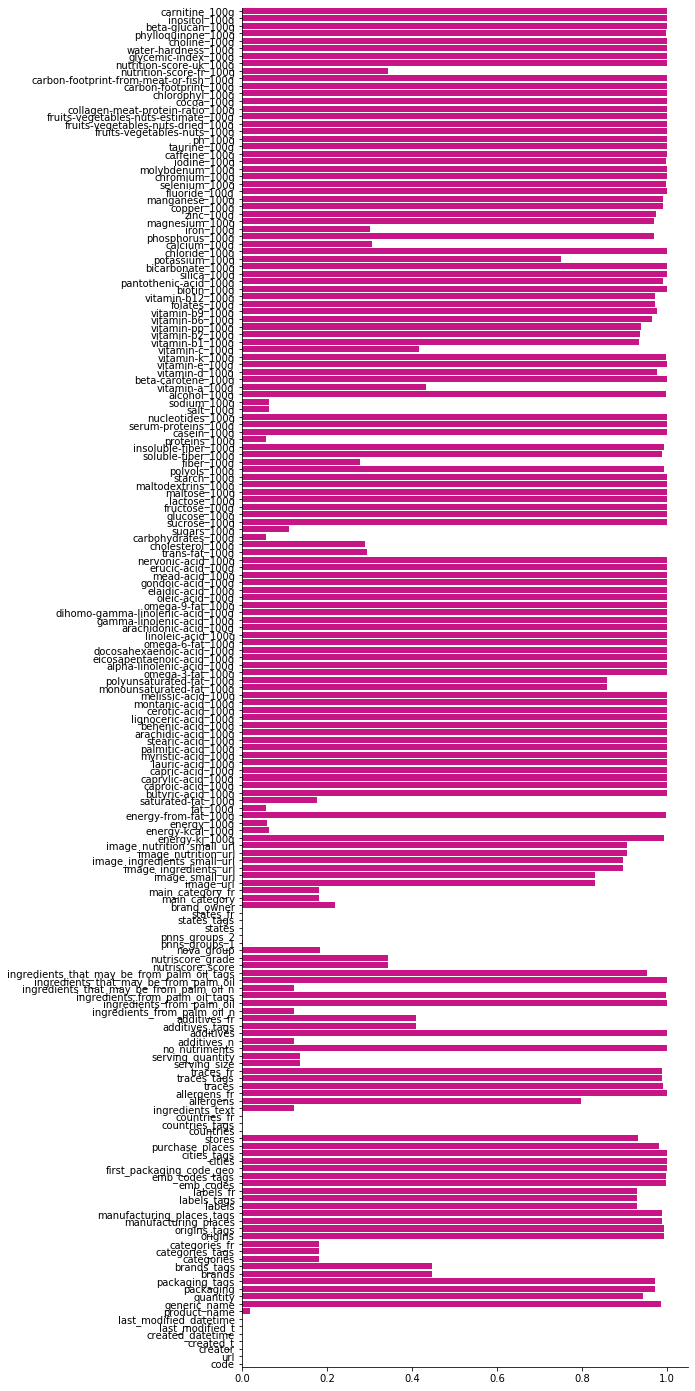

In [3]:
#Analyse d'une partie des données
data_test=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t', error_bad_lines=True,nrows=50000,low_memory=False)
df=pd.DataFrame(data_test)
df_memory=[df.memory_usage().sum()*30]
# Proportion de valeurs manquantes par colonne
null_counts = df.isnull().mean(axis=0)

# barplot des valeurs manquantes par colonne
fig = plt.figure(figsize=(8,25))
plt.barh(np.arange(len(null_counts)),null_counts, color="mediumvioletred")
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)

##### Choix des variables

In [4]:
#Choix de variables intéressantes pour l'analyse d'un indicateur: le nutrition score
variables=['code','emb_codes','nutriscore_grade','product_name','main_category','nutrition-score-fr_100g','energy_100g','proteins_100g','sugars_100g','carbohydrates_100g','fat_100g','saturated-fat_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g','salt_100g','sodium_100g']
print(variables)

['code', 'emb_codes', 'nutriscore_grade', 'product_name', 'main_category', 'nutrition-score-fr_100g', 'energy_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'salt_100g', 'sodium_100g']


###### Traitement du fichier de données par chunks

In [5]:
#Chargement du jeu de données complet sur les variables choisies
data_iter=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t', error_bad_lines=True,chunksize=5000,low_memory=False)
databis=[]
for i in data_iter:
    b=i[variables]
    databis.append(b)
df = pd.concat(databis, ignore_index=True)

In [6]:
df #Affichage du dataframe

,code,emb_codes,nutriscore_grade,product_name,main_category,nutrition-score-fr_100g,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,salt_100g,sodium_100g
0,0000000000017,NaN,NaN,Vitória crackers,NaN,NaN,1569.0,7.8,15.0,70.1,7.0,3.08,NaN,NaN,1.40,0.560
1,0000000000031,NaN,NaN,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,NaN,NaN,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,NaN,d,moutarde au moût de raisin,en:mustards,18.0,936.0,5.1,22.0,29.0,8.2,2.20,NaN,NaN,4.60,1.840
4,00000000001111111111,NaN,NaN,Sfiudwx,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403858,9999999900686,NaN,NaN,Marrons glacés,en:marrons-glaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403859,9999999901,NaN,NaN,Scs,NaN,NaN,418.0,1.0,1.0,2.0,12.0,1.00,NaN,NaN,1.00,0.400
1403860,9999999910128,NaN,NaN,Sandwich club Rillette poisson combava,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403861,9999999990397,NaN,NaN,Fati,NaN,NaN,100.0,1.6,0.6,2.4,0.3,0.00,NaN,NaN,0.64,0.256


In [7]:
df_memory.append(df.memory_usage().sum())
#print(df_memory)

##### Détermination d'une clé primaire

In [8]:
def primary_key(data):
    b=data.nunique()
    max=0
    c=''
    for i in range(len(b)):
        if max<b[i]:
            max=b[i]
            c=b.index[i]
    print (max, c)

In [9]:
primary_key(df)

1403311 code


'code' semble être un bon choix de clé primaire avec 1403311 entrées uniques sur 1403863 entrées au total.

## [NETTOYAGE DES DONNEES](#sommaire)<a class="anchor" id="5"></a>

##### Analyse des données restantes

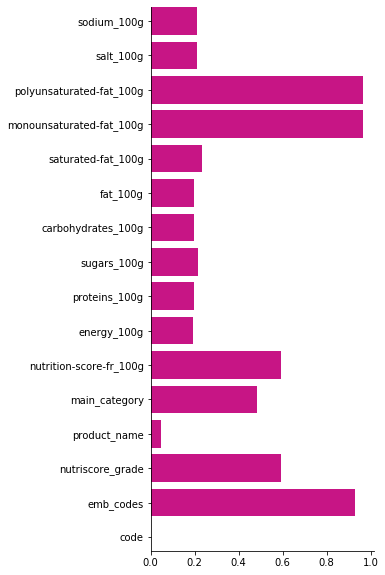

In [10]:
df2=pd.DataFrame(df)

# Proportion de valeurs manquantes par colonne
null_counts = df2.isnull().mean(axis=0)

# barplot des valeurs manquantes par colonne
fig = plt.figure(figsize=(4,10))
plt.barh(np.arange(len(null_counts)),null_counts, color="mediumvioletred")
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)


##### Suppression des données inutiles

On supprime les colonnes 'emb_codes','monounsaturated-fat_100g' et 'monounsaturated-fat_100g' avec beaucoup de données manquantes

In [11]:
#Suppression des colonne 'emb_codes','monounsaturated-fat_100g' et 'monounsaturated-fat_100g'
df3=df2.drop(columns=['emb_codes','monounsaturated-fat_100g','polyunsaturated-fat_100g'])
df_memory.append(df3.memory_usage().sum())


##### Suppression des doublons sur la clé primaire

In [12]:
df3=df3.drop_duplicates(subset=['code'])
df_memory.append(df3.memory_usage().sum())


##### Suppression des outliers

In [13]:
print('Taille initiale: '+str(df3.size))
df3=df3[df3['energy_100g']<3700] #Calories contenues dans l'huile pure
df_memory.append(df3.memory_usage().sum())
print('il nous reste '+str(df3.size)+' entrées')
df3=df3[df3['saturated-fat_100g']<df3['fat_100g']] #saturated-fat doit être inférieur à fat
df_memory.append(df3.memory_usage().sum())
print('il nous reste '+str(df3.size)+' entrées')
df3=df3[df3['sugars_100g']<df3['carbohydrates_100g']] #sugars inférieur à carbohydrates
df_memory.append(df3.memory_usage().sum())
print('il nous reste '+str(df3.size)+' entrées')
df3=df3[df3['sodium_100g']<df3['salt_100g']] #sodium inférieur à salt
df_memory.append(df3.memory_usage().sum())
print('il nous reste '+str(df3.size)+' entrées')
df3=df3[df3['salt_100g']<100] #salt inférieur à 100g
df_memory.append(df3.memory_usage().sum())
print('il nous reste '+str(df3.size)+' entrées')
df3=df3[(df3['carbohydrates_100g']+df3['proteins_100g']+df3['fat_100g'])<100] #somme des 3 principales composants inférieure à 100
print('il nous reste '+str(df3.size)+' entrées')
df_memory.append(df3.memory_usage().sum())

Taille initiale: 18243043
il nous reste 14610297 entrées
il nous reste 11602149 entrées
il nous reste 9532991 entrées
il nous reste 8783853 entrées
il nous reste 8778757 entrées
il nous reste 8707699 entrées


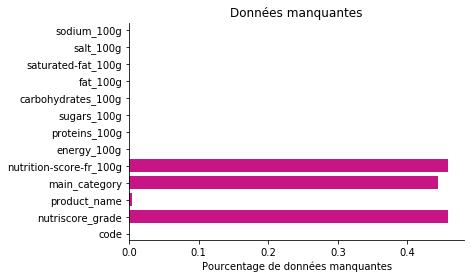

In [19]:
# Proportion de valeurs manquantes par colonne
null_counts = df3.isnull().mean(axis=0)

# barplot des valeurs manquantes par colonne
fig,ax = plt.subplots()
plt.barh(np.arange(len(null_counts)),null_counts, color="mediumvioletred")
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation=0, fontsize=10)
ax.set_title('Données manquantes')
ax.set_xlabel('Pourcentage de données manquantes')
sns.despine()
plt.margins(y=0)
plt.show()

Il nous manque encore presque la moitié des nutrition scores. Nous ne garderons que les entrées avec nutrition score pour l'export

## [EXPORT DES DONNEES](#sommaire)<a class="anchor" id="6"></a>

In [20]:
#Export du fichier complet et d'un fichier sans les entrées incomplètes
df3.to_csv("Food_data.csv",index=False)
df4=df3.dropna(subset=['nutrition-score-fr_100g'])
df4=df4.dropna(subset=['nutriscore_grade'])
df_memory.append(df4.memory_usage().sum())
df4.to_csv("Truncated_Food_data.csv",index=False)

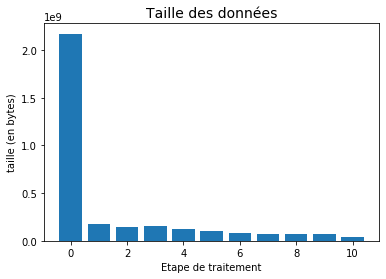

In [24]:
fig, ax = plt.subplots()
x = np.arange(len(df_memory))
h=ax.bar(x,df_memory)
ax.set_title('Taille des données', fontsize=14)
ax.set_ylabel('taille (en bytes)')
ax.set_xlabel('Etape de traitement')
plt.show()

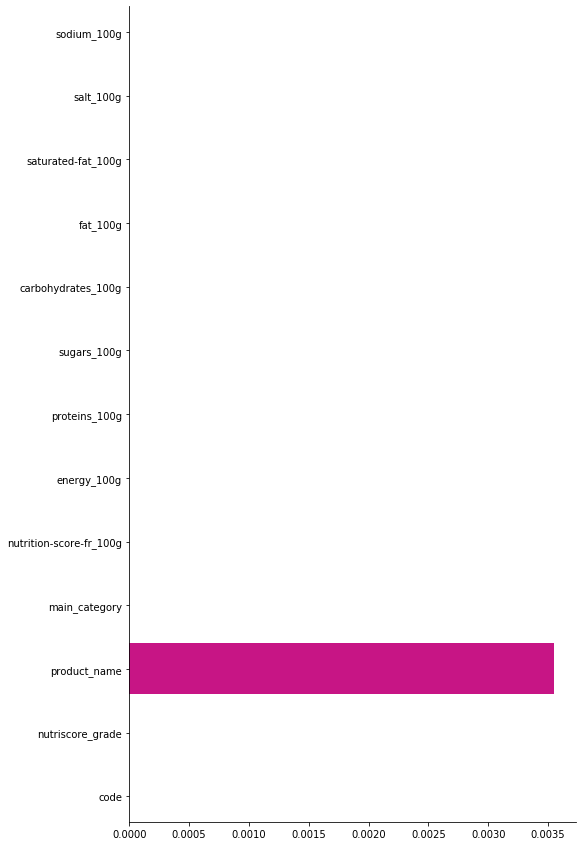

In [22]:
# Proportion de valeurs manquantes par colonne
null_counts = df4.isnull().mean(axis=0)

# barplot des valeurs manquantes par colonne
fig = plt.figure(figsize=(8,15))
plt.barh(np.arange(len(null_counts)),null_counts, color="mediumvioletred")
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)